**Machine Learning - Horse or Human Project**

Aynur TOPARLAK


In [ ]:
import seaborn as sns

import os
import zipfile
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from google.colab.patches import cv2_imshow


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-08 12:09:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 74.125.124.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   148MB/s    in 1.0s    

2020-07-08 12:09:21 (148 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)

train_human_names = os.listdir(train_human_dir)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]


In [ ]:
!ls '/tmp/horse-or-human'

horses	humans


In [ ]:
def hogImage(path):
  img=cv2.imread(path,0)
  resized = cv2.resize(img, (150,150))
  img = np.array(resized, dtype=np.uint8)
  hog = cv2.HOGDescriptor()
  hogdscriptor = hog.compute(img)
  d1,d2=hogdscriptor.shape
  hogdscriptor= hogdscriptor.reshape(1,d1)
  return hogdscriptor

def colourImage(path):
  img = load_img(path, target_size=(300, 300))  # this is a PIL image
  x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
  x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
  x /= 255

  d1, d2, d3, d4 = x.shape
  color_features = x.reshape((1,d2*d3*d4))
  return color_features 

def combineImages(color_features,hogdscriptor):
  combine = np.concatenate((color_features, hogdscriptor),axis=1)
  d1,d2=combine.shape
  combine= combine.reshape(d2)
  return combine 


In [ ]:
listHumHorIm =  []
label =  []

for path in (horse_img_files):
  hogdscriptor=hogImage(path)
  color_features=colourImage(path)
  featureVector=combineImages(color_features,hogdscriptor)
  listHumHorIm.append(featureVector)
  label.append(0)

for path in (human_img_files):
  hogImage(path)
  colourImage(path)
  combineImages(color_features,hogdscriptor)
  listHumHorIm.append(featureVector)
  label.append(1)


print(len(listHumHorIm))
print(len(label))


1027
1027


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(listHumHorIm, label, test_size = 0.2, random_state = 0)
print(len(xTrain))
print(yTrain)

821
[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

KNN Part

In [ ]:
knn_ec = KNeighborsClassifier(n_neighbors = 2,algorithm='ball_tree',metric='euclidean')

knn_ec.fit(xTrain,yTrain)

cv_scores = cross_val_score(knn_ec, listHumHorIm, label, cv=5)

print(knn_ec.score(xTest, yTest))

pred = knn_ec.predict(xTest)

cmat = metrics.confusion_matrix(yTest, pred)
print(metrics.classification_report(yTest,pred))

print(cv_scores)
print(cmat)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       110

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

[1.         1.         1.         1.         0.99512195]
[[ 96   0]
 [  0 110]]


In [ ]:
knn_ec

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
k_list = list(range(1,10,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xTrain, yTrain, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

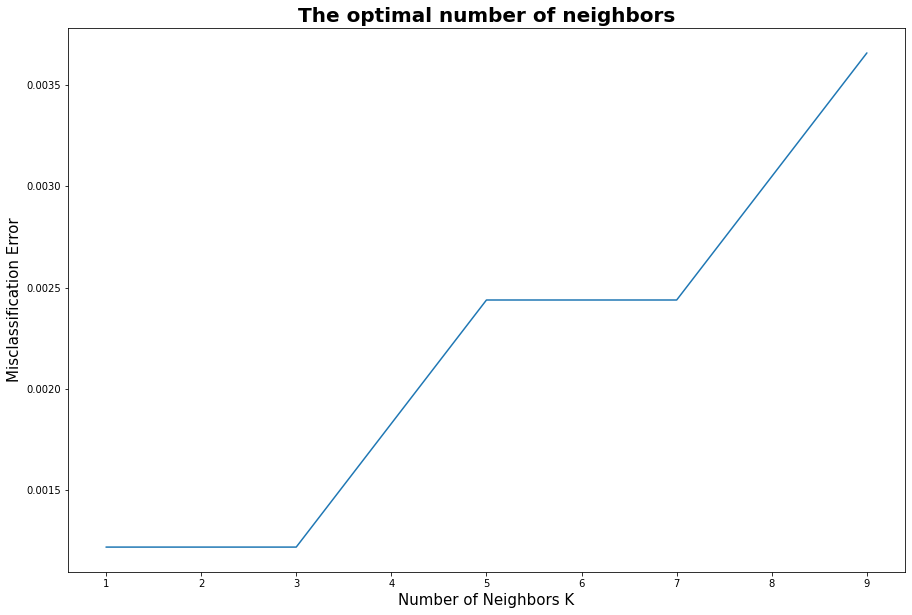

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

SVM Part

In [ ]:
svmclf_lin = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
svmclf_lin.fit(listHumHorIm,label)

cv_scores = cross_val_score(svmclf_lin,listHumHorIm,label, cv=5)

#Predict the response for test dataset
#pred_lin = svmclf_lin.predict(xTest)

#print("Accuracy:",metrics.accuracy_score(yTest,pred_lin))

#print(metrics.confusion_matrix(testLabel, pred_lin))

print(cv_scores)


[0.99514563 1.         0.99512195 1.         0.99512195]


In [ ]:
svmclf_lin

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
cv_scores = cross_val_score(svmclf_lin, listHumHorIm, label, cv=5)
print(cv_scores)

[0.96116505 0.95145631 0.95609756 0.96585366 0.95121951]


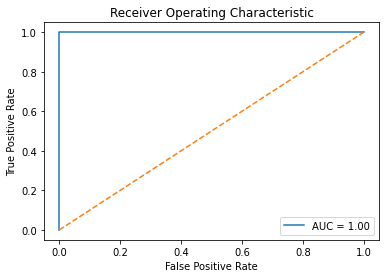

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svmclf_lin.predict_proba(xTest)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(yTest, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

DL Part

In [ ]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 - 15s - loss: 1.7054 - acc: 0.5557
Epoch 2/15
8/8 - 13s - loss: 0.6989 - acc: 0.6207
Epoch 3/15
8/8 - 15s - loss: 0.8575 - acc: 0.6830
Epoch 4/15
8/8 - 13s - loss: 0.4548 - acc: 0.7686
Epoch 5/15
8/8 - 13s - loss: 0.2442 - acc: 0.9077
Epoch 6/15
8/8 - 13s - loss: 0.4167 - acc: 0.9021
Epoch 7/15
8/8 - 13s - loss: 1.4629 - acc: 0.8087
Epoch 8/15
8/8 - 14s - loss: 0.1272 - acc: 0.9551
Epoch 9/15
8/8 - 13s - loss: 0.2027 - acc: 0.9266
Epoch 10/15
8/8 - 12s - loss: 0.0510 - acc: 0.9867
Epoch 11/15
8/8 - 12s - loss: 0.0266 - acc: 0.9900
Epoch 12/15
8/8 - 12s - loss: 0.4252 - acc: 0.8854
Epoch 13/15
8/8 - 13s - loss: 0.0932 - acc: 0.9648
Epoch 14/15
8/8 - 12s - loss: 0.0150 - acc: 0.9967
Epoch 15/15
8/8 - 12s - loss: 3.4373 - acc: 0.8643


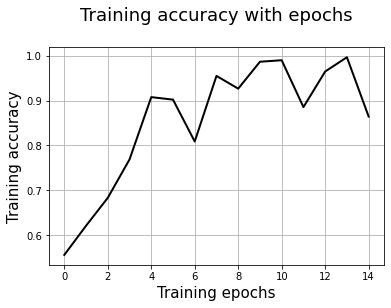

In [ ]:
plt.plot(history.history['acc'],c='k',lw=2)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.show()

In [ ]:
listHumHorIm1 =  []
label =  []

for path in (horse_img_files):
  img = cv2.imread(path)
  img=img.reshape(img.shape[0],img.shape[1]*img.shape[2])
  listHumHorIm1.append(img)
  label.append(0)

for path in (human_img_files):
  img = cv2.imread(path)
  img=img.reshape(img.shape[0],img.shape[1]*img.shape[2])
  listHumHorIm1.append(img)
  label.append(1)


In [ ]:
def pcaSK(sample,components):
  pca = PCA()
  pca.n_components = components
  pca_data = pca.fit_transform(sample)
  return pca_data

pcaSet=[]
for i in range(len(listHumHorIm1)):
  pcaSet.append(pcaSK(listHumHorIm1[i],40))
 
pcaSet = np.array(pcaSet)

nsamples, nx, ny = pcaSet.shape
pcaSet = pcaSet.reshape((nsamples,nx*ny))

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(pcaSet, label, test_size = 0.2, random_state = 0)


model = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(xTrain, yTrain)

testRes = model.predict(xTest)

accuracy=metrics.accuracy_score(testRes, yTest)
print(accuracy)

0.8592233009708737


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(pcaSet, label, test_size = 0.3, random_state = 0)


model = RandomForestClassifier(n_estimators=1000, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(xTrain, yTrain)

testRes = model.predict(xTest)

accuracy=metrics.accuracy_score(testRes, yTest)
print(accuracy)

0.8187702265372169


In [ ]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

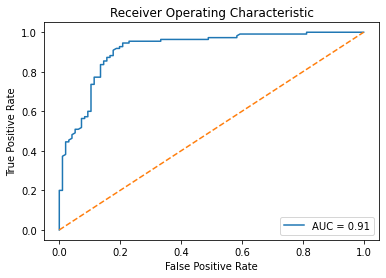

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = model.predict_proba(xTest)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(yTest, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');